In [1]:

import optuna
import pandas as pd

C:\Users\danie\tuWien\10_semester\splinter\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
study = optuna.load_study(study_name='vgg16_grid_1_pruning_True', storage="sqlite:///../splinter.db")

In [3]:
df = study.trials_dataframe()
df = df[df['state'] == 'COMPLETE']

In [4]:
df

,number,values_accuracy,values_energy (J),values_latency (ms),datetime_start,datetime_complete,duration,params_cpu-freq,params_edge-accelerator,params_layer,...,user_attrs_avg latency transfer (ms),user_attrs_tensor size (KB),user_attrs_utilization cloud cpu (%),user_attrs_utilization cloud gpu (%),user_attrs_utilization edge cpu (%),system_attrs_fixed_params,system_attrs_grid_id,system_attrs_nsga3:generation,system_attrs_search_space,state
0,0,0.609,132.318064,183.348920,2024-09-17 09:10:53.076341,2024-09-17 09:14:15.954302,0 days 00:03:22.877961,1800.0,max,12.0,...,7.642763,392.024414,6.1,0.000,40.3,NaN,NaN,0.0,NaN,COMPLETE
1,1,0.607,148.738730,314.768542,2024-09-17 09:14:16.048500,2024-09-17 09:19:58.568696,0 days 00:05:42.520196,600.0,max,3.0,...,14.224237,784.023438,13.6,0.000,55.7,NaN,NaN,0.0,NaN,COMPLETE
3,3,0.607,75.096950,3370.521616,2024-09-17 09:19:59.001526,2024-09-17 10:16:46.520411,0 days 00:56:47.518885,800.0,off,14.0,...,3.534818,98.024414,1.7,2.258,25.4,NaN,NaN,0.0,NaN,COMPLETE
4,4,0.609,72.711308,164.335418,2024-09-17 10:16:46.624787,2024-09-17 10:19:48.956992,0 days 00:03:02.332205,1800.0,max,5.0,...,24.248222,1568.024414,1.7,5.223,42.7,NaN,NaN,0.0,NaN,COMPLETE
5,5,0.608,112.690885,2009.652507,2024-09-17 10:19:49.067214,2024-09-17 10:53:40.966057,0 days 00:33:51.898843,1600.0,off,19.0,...,2.787892,24.517578,1.5,0.000,25.3,NaN,NaN,0.0,NaN,COMPLETE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10170,10170,0.608,126.665141,216.400191,2024-10-14 07:12:37.012666,2024-10-14 07:16:44.157807,0 days 00:04:07.145141,600.0,std,13.0,...,7.961692,392.024414,4.4,0.000,50.8,"{'cpu-freq': 600, 'edge-accelerator': 'std', '...",NaN,NaN,NaN,COMPLETE
10172,10172,0.611,120.592401,170.343436,2024-10-14 07:17:36.959038,2024-10-14 07:20:47.931395,0 days 00:03:10.972357,1800.0,max,15.0,...,4.071817,98.024414,3.5,0.000,34.6,"{'cpu-freq': 1800, 'edge-accelerator': 'max', ...",NaN,NaN,NaN,COMPLETE
10177,10177,0.608,71.312751,442.567112,2024-10-14 07:22:56.040527,2024-10-14 07:30:40.773586,0 days 00:07:44.733059,1600.0,max,20.0,...,2.165153,4.015625,1.7,0.000,14.0,"{'cpu-freq': 1600, 'edge-accelerator': 'max', ...",NaN,NaN,NaN,COMPLETE
10178,10178,0.609,71.454621,1427.875896,2024-10-14 07:30:57.996278,2024-10-14 07:55:09.855474,0 days 00:24:11.859196,1400.0,off,10.0,...,5.852887,196.024414,1.7,3.274,25.5,"{'cpu-freq': 1400, 'edge-accelerator': 'off', ...",NaN,NaN,NaN,COMPLETE


# Exploratory Figure 1

In [14]:
df_fig1 = df[(df['params_layer'] == 22) & (df['params_edge-accelerator'] == 'off')]
df_fig1 = df_fig1[['values_energy (J)', 'values_latency (ms)', 'params_cpu-freq']]

In [15]:
df_fig1

,values_energy (J),values_latency (ms),params_cpu-freq
2980,10.412557,3011.201654,1000.0
3027,7.847053,1751.159347,1800.0
3046,7.895175,1762.458643,800.0
3120,7.933604,1946.636014,1600.0
3122,8.319973,2199.770651,1400.0
3213,14.600982,4922.340593,600.0
3374,8.293766,2542.774185,1200.0


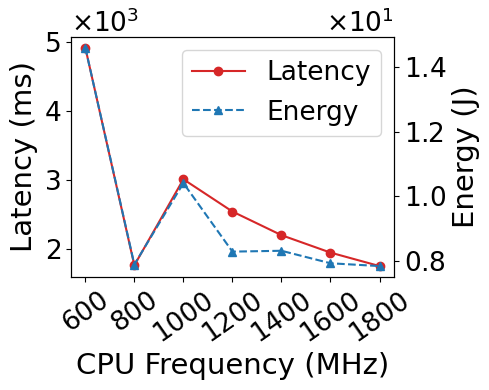

In [138]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Define font size variables
scale_fonts = 7
label_font_size = 14 + scale_fonts
title_font_size = 16 + scale_fonts
tick_font_size = 12 + scale_fonts
legend_font_size = 12 + scale_fonts
offset_font_size = 12 + scale_fonts

# Group by 'params_cpu-freq' and calculate the mean of 'values_energy in mJ' and 'values_latency in ms'
grouped_df = df_fig1.groupby('params_cpu-freq').max().reset_index()

# Create the plot
fig, ax1 = plt.subplots(figsize=(5, 4))
ax2 = ax1.twinx()

# Plot the latency on the first y-axis
ax1.set_xlabel('CPU Frequency (MHz)', fontsize=label_font_size)
ax1.set_ylabel('Latency (ms)', fontsize=label_font_size)
latency_line, = ax1.plot(grouped_df['params_cpu-freq'], grouped_df['values_latency (ms)'], color='tab:red', marker='o',
                         linestyle='-')
ax1.tick_params(axis='y', labelsize=tick_font_size)
ax1.tick_params(axis='x', labelsize=tick_font_size)

# Set x-axis ticks from 600 to 1800 with increments of 200
ax1.set_xticks(range(600, 1801, 200))

# Rotate x-axis labels
for label in ax1.get_xticklabels():
    label.set_rotation(35)

# Create a second y-axis for the energy
ax2.set_ylabel('Energy (J)', fontsize=label_font_size)
energy_line, = ax2.plot(grouped_df['params_cpu-freq'], grouped_df['values_energy (J)'], color='tab:blue', marker='^',
                        linestyle='--')
ax2.tick_params(axis='y', labelsize=tick_font_size)

# Format y-axis ticks as scientific notation for both y-axes
ax1.yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
ax1.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
ax2.yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
ax2.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))

# Set offset text size for y-axes
ax1.yaxis.get_offset_text().set_fontsize(offset_font_size)
ax2.yaxis.get_offset_text().set_fontsize(offset_font_size)

# Add a single legend
lines = [latency_line, energy_line]
labels = ['Latency', 'Energy']
ax2.legend(lines, labels, loc='upper right', fontsize=legend_font_size)

# Adjust layout
fig.tight_layout()
#fig.subplots_adjust(bottom=0.2)  # Adjust the bottom to make room for rotated labels

# Save the plot
plt.savefig('cpu_settings_effect.pdf', format='pdf', bbox_inches='tight')

# Show the plot
plt.show()


# Exploratory Figure 2

In [5]:
df_fig2 = df[
    ((df['params_layer'] == 0) & (df['params_cpu-freq'] == 1800) & (df['params_edge-accelerator'] == 'off') & (df['params_server-accelerator'] == True)) |
    ((df['params_layer'] >= 1) & (df['params_layer'] <= 21) & (df['params_cpu-freq'] == 1800) & (df['params_edge-accelerator'] == 'max') & (df['params_server-accelerator'] == True)) |
    ((df['params_layer'] == 22) & (df['params_cpu-freq'] == 1800) & (df['params_edge-accelerator'] == 'max') & (df['params_server-accelerator'] == False))
]
df_fig2 = df_fig2[['values_energy (J)', 'values_latency (ms)', 'params_layer', 'user_attrs_avg energy cloud (J)','user_attrs_avg energy edge (J)']]

In [6]:
df_fig2

,values_energy (J),values_latency (ms),params_layer,user_attrs_avg energy cloud (J),user_attrs_avg energy edge (J)
4,72.711308,164.335418,5.0,71.823883,0.887425
1073,66.209792,484.635502,21.0,63.535088,2.674705
2586,2.323455,424.518960,22.0,0.000000,2.323455
2589,67.858597,93.747530,0.0,67.531593,0.327004
6929,60.820464,115.663860,18.0,60.190155,0.630309
6963,66.226895,124.586510,7.0,65.560791,0.666104
7077,78.600785,203.837796,4.0,77.525047,1.075737
7161,63.624687,100.953135,14.0,63.081543,0.543144
7163,65.802717,112.412516,12.0,65.197937,0.604780
7174,82.070863,239.901865,1.0,80.729759,1.341104


## Log Variant

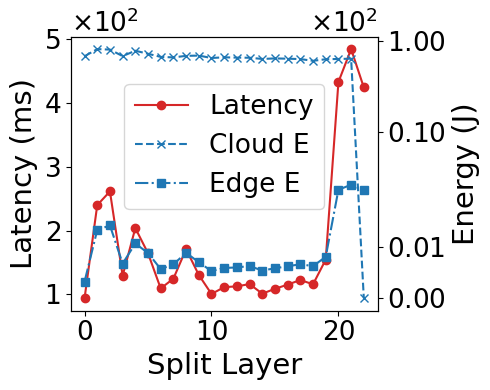

In [140]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Define font size variables
scale_fonts = 7
label_font_size = 14 + scale_fonts
title_font_size = 16 + scale_fonts
tick_font_size = 12 + scale_fonts
legend_font_size = 12 + scale_fonts 
offset_font_size = 12 + scale_fonts

# Group by 'params_cpu-freq' and calculate the mean of 'values_energy in mJ' and 'values_latency in ms'
grouped_df = df_fig2.groupby('params_layer').max().reset_index()


# Create the plot
fig, ax1 = plt.subplots(figsize=(5, 4))

# Plot the latency on the first y-axis
ax1.set_xlabel('Split Layer', fontsize=label_font_size)
ax1.set_ylabel('Latency (ms)', fontsize=label_font_size)
latency_line, = ax1.plot(grouped_df['params_layer'], grouped_df['values_latency (ms)'], color='tab:red', marker='o',
                         linestyle='-')
ax1.tick_params(axis='y', labelsize=tick_font_size)
ax1.tick_params(axis='x', labelsize=tick_font_size)

# Remove scientific notation for x-axis ticks
ax1.xaxis.set_major_formatter(ticker.ScalarFormatter(useOffset=False))
ax1.ticklabel_format(style='plain', axis='x')

# Create a second y-axis for the energy
ax2 = ax1.twinx()
ax2.set_ylabel('Energy (J)', fontsize=label_font_size)
ax2.set_yscale('symlog')
energy_line, = ax2.plot(grouped_df['params_layer'], grouped_df['user_attrs_avg energy cloud (J)'], color='tab:blue', marker='x',
                        linestyle='--')
energy_line2, = ax2.plot(grouped_df['params_layer'], grouped_df['user_attrs_avg energy edge (J)'], color='tab:blue', marker='s',
                        linestyle='-.')
ax2.tick_params(axis='y', labelsize=tick_font_size)

# Format y-axis ticks as scientific notation for both y-axes
ax1.yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
ax1.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
ax2.yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
ax2.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))

# Set offset text size for y-axes
ax1.yaxis.get_offset_text().set_fontsize(offset_font_size)
ax2.yaxis.get_offset_text().set_fontsize(offset_font_size)

# Add a single legend
lines = [latency_line, energy_line, energy_line2]
labels = ['Latency', 'Cloud E', 'Edge E']
ax2.legend(lines, labels, loc='center', bbox_to_anchor=(0.5, 0.6),fontsize=legend_font_size)

# Adjust layout
fig.tight_layout()
#fig.subplots_adjust(bottom=0.2)  # Adjust the bottom to make room for rotated labels

# Save the plot
plt.savefig('split_layer_log.pdf', format='pdf', bbox_inches='tight')

# Show the plot
plt.show()

Split axis

Plot latency only once

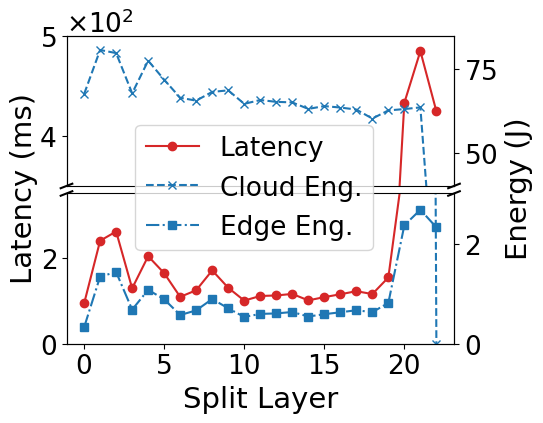

In [13]:
from matplotlib.ticker import ScalarFormatter
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Define font size variables
scale_fonts = 7
label_font_size = 14 + scale_fonts
title_font_size = 16 + scale_fonts
tick_font_size = 12 + scale_fonts
legend_font_size = 12 + scale_fonts
offset_font_size = 12 + scale_fonts

# Group by 'params_layer' and calculate the max values
grouped_df = df_fig2.groupby('params_layer').max().reset_index()

# Define the split points for the broken y-axes on both sides
latency_lower_limit = 0
latency_upper_limit = 350
latency_middle_gap_start = 350

energy_lower_limit = 0
energy_upper_limit = 3  # Adjust based on edge energy range
energy_middle_gap_start = 40  # Adjust based on cloud energy range

# Create the subplots (stacked vertically) for the broken y-axis effect on both sides
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(5, 4))
fig.subplots_adjust(hspace=0.05)  # Minimal space between the two plots

# Plot latency on both subplots (left y-axis) with different scales
ax1.plot(grouped_df['params_layer'], grouped_df['values_latency (ms)'], color='tab:red', marker='o', linestyle='-')
ax2.plot(grouped_df['params_layer'], grouped_df['values_latency (ms)'], color='tab:red', marker='o', linestyle='-')

# Set left y-axis labels and limits for each subplot
ax1.set_ylim(latency_middle_gap_start, 500)  # Upper section for latency
ax2.set_ylim(latency_lower_limit, latency_upper_limit)  # Lower section for latency
#ax1.set_ylabel('Latency (ms)', fontsize=label_font_size)
#ax2.set_ylabel('Latency (ms)', fontsize=label_font_size)
ax1.tick_params(axis='y', labelsize=tick_font_size)
ax2.tick_params(axis='y', labelsize=tick_font_size)

# Plot cloud energy on the upper subplot's right y-axis
ax1_energy = ax1.twinx()
ax1_energy.plot(grouped_df['params_layer'], grouped_df['user_attrs_avg energy cloud (J)'], color='tab:blue', marker='x', linestyle='--', label='Cloud Energy')
ax1_energy.set_ylim(energy_middle_gap_start, 85)
ax1_energy.tick_params(axis='y', labelsize=tick_font_size)

# Plot edge energy on the lower subplot's right y-axis
ax2_energy = ax2.twinx()
ax2_energy.plot(grouped_df['params_layer'], grouped_df['user_attrs_avg energy edge (J)'], color='tab:blue', marker='s', linestyle='-.', label='Edge Energy')
ax2_energy.plot(grouped_df['params_layer'], grouped_df['user_attrs_avg energy cloud (J)'], color='tab:blue', marker='x', linestyle='--', label='Cloud Energy')
ax2_energy.set_ylim(energy_lower_limit, energy_upper_limit)
ax2_energy.tick_params(axis='y', labelsize=tick_font_size)

# Remove the x-axis ticks on the upper plot
ax1.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax1.xaxis.tick_top()
ax1.tick_params(labeltop=False, top=False)  # Disable top ticks on the upper plot
ax2.xaxis.tick_bottom()
ax2.tick_params(axis='x', labelsize=tick_font_size)

# Add diagonal cut marks for both left and right y-axes to represent the broken axis
d = .015  # Size of the diagonal lines in axes coordinates
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False)
ax1.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal for latency
ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal for energy
kwargs.update(transform=ax2.transAxes)        # Switch to the bottom axes for bottom part
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal for latency
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal for energy

# Labels and legend
ax2.set_xlabel('Split Layer', fontsize=label_font_size)
lines = [ax1.lines[0], ax1_energy.lines[0], ax2_energy.lines[0]]
labels = ['Latency', 'Cloud Eng.', 'Edge Eng.']


# Set scientific notation for both y-axes on the left
ax1.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax1.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
ax2.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax2.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))

# Set scientific notation for both y-axes on the right
formatter = ScalarFormatter(useMathText=True)
formatter.set_powerlimits((0,0))
ax1_energy.yaxis.set_major_formatter(formatter)
ax1_energy.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
ax2_energy.yaxis.set_major_formatter(formatter)
ax2_energy.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
ax1.yaxis.get_offset_text().set_fontsize(offset_font_size)
ax2.yaxis.get_offset_text().set_visible(False)
ax1_energy.yaxis.get_offset_text().set_fontsize(offset_font_size)

# Add a single y-axis label in the center for latency
fig.text(0.04, 0.5, 'Latency (ms)', va='center', ha='center', rotation='vertical', fontsize=label_font_size)
fig.text(1.03, 0.5, 'Energy (J)', va='center', ha='center', rotation='vertical', fontsize=label_font_size)
# Add a centralized legend for the whole figure
fig.legend(lines, labels, loc='center', bbox_to_anchor=(0.5, 0.5), fontsize=legend_font_size)

# Save and show plot
plt.savefig('split_layer_effect_double_broken_axis.pdf', format='pdf', bbox_inches='tight')
plt.show()


# Exploratory Figure 3

In [142]:
df_fig3 = df[(df['params_cpu-freq'] == 1800) & (df['params_layer'] == 22) & (df['params_server-accelerator'] == False)]
df_fig3 = df_fig3[['values_energy (J)', 'values_latency (ms)', 'params_edge-accelerator']]

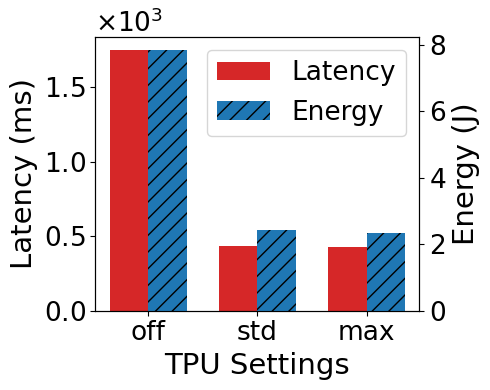

In [143]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Reorder the dataframe
df_fig3['params_edge-accelerator'] = pd.Categorical(df_fig3['params_edge-accelerator'],
                                                    categories=['off', 'std', 'max'], ordered=True)
df_fig3 = df_fig3.sort_values('params_edge-accelerator')

# Define font size variables
scale_fonts = 7
label_font_size = 14 + scale_fonts
title_font_size = 16 + scale_fonts
tick_font_size = 12 + scale_fonts
legend_font_size = 12 + scale_fonts
offset_font_size = 12 + scale_fonts

# Create the plot
fig, ax1 = plt.subplots(figsize=(5, 4))

# Set the width for the bars
bar_width = 0.35
positions = range(len(df_fig3))

# Plot the latency bars
latency_bars = ax1.bar([p - bar_width / 2 for p in positions], df_fig3['values_latency (ms)'], width=bar_width,
                       color='tab:red')
ax1.set_ylabel('Latency (ms)', fontsize=label_font_size)
ax1.tick_params(axis='y', labelsize=tick_font_size)

# Create a secondary y-axis for the energy bars
ax2 = ax1.twinx()
energy_bars = ax2.bar([p + bar_width / 2 for p in positions], df_fig3['values_energy (J)'], width=bar_width,
                      color='tab:blue', hatch="//")
ax2.set_ylabel('Energy (J)', fontsize=label_font_size)
ax2.tick_params(axis='y', labelsize=tick_font_size)

# Format y-axis ticks as scientific notation for both y-axes
ax1.yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
ax1.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
ax2.yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
ax2.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))

# Set offset text size for y-axes
ax1.yaxis.get_offset_text().set_fontsize(offset_font_size)
ax2.yaxis.get_offset_text().set_fontsize(offset_font_size)

# Set the x-axis
ax1.set_xticks(positions)
ax1.set_xticklabels(df_fig3['params_edge-accelerator'])
ax1.set_xlabel('TPU Settings', fontsize=label_font_size)
ax1.tick_params(axis='x', labelsize=tick_font_size)

# Add a single legend
lines = [latency_bars, energy_bars]
labels = ['Latency', 'Energy']
ax1.legend(lines, labels, loc='upper right', fontsize=legend_font_size)

# Show the plot
fig.tight_layout()
plt.savefig('tpu_settings_effect.pdf', format='pdf', bbox_inches='tight')

# Show the plot
plt.show()

# Exploratory Figure 4

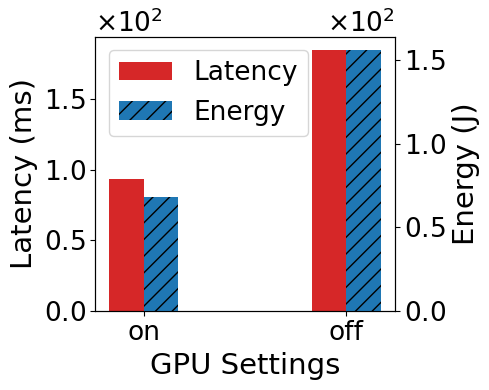

In [144]:
df_fig4 = df[(df['params_cpu-freq'] == 1800) & (df['params_layer'] == 0)]
df_fig4 = df_fig4[['values_energy (J)', 'values_latency (ms)', 'params_server-accelerator']]
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Define font size variables
scale_fonts = 7
label_font_size = 14 + scale_fonts
title_font_size = 16 + scale_fonts
tick_font_size = 12 + scale_fonts
legend_font_size = 12 + scale_fonts
offset_font_size = 12 + scale_fonts

# Create the plot
fig, ax1 = plt.subplots(figsize=(5, 4))

# Set the width for the bars
bar_width = 0.17
positions = range(len(df_fig4))

# Plot the latency bars
latency_bars = ax1.bar([p - bar_width / 2 for p in positions], df_fig4['values_latency (ms)'], width=bar_width,
                       color='tab:red')
ax1.set_ylabel('Latency (ms)', fontsize=label_font_size)
ax1.tick_params(axis='y', labelsize=tick_font_size)

# Create a secondary y-axis for the energy bars
ax2 = ax1.twinx()
energy_bars = ax2.bar([p + bar_width / 2 for p in positions], df_fig4['values_energy (J)'], width=bar_width,
                      color='tab:blue', hatch="//")
ax2.set_ylabel('Energy (J)', fontsize=label_font_size)
ax2.tick_params(axis='y', labelsize=tick_font_size)

# Format y-axis ticks as scientific notation for both y-axes
ax1.yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
ax1.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
ax2.yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
ax2.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))

# Set offset text size for y-axes
ax1.yaxis.get_offset_text().set_fontsize(offset_font_size)
ax2.yaxis.get_offset_text().set_fontsize(offset_font_size)

# Set the x-axis
ax1.set_xticks(positions)
ax1.set_xticklabels(['on' if label else 'off' for label in df_fig4['params_server-accelerator']])
ax1.set_xlabel('GPU Settings', fontsize=label_font_size)
ax1.tick_params(axis='x', labelsize=tick_font_size)

# Add a single legend
lines = [latency_bars, energy_bars]
labels = ['Latency', 'Energy']
ax1.legend(lines, labels, loc='upper left', fontsize=legend_font_size)


# Show the plot
fig.tight_layout()
plt.savefig('gpu_settings_effect.pdf', format='pdf', bbox_inches='tight')

# Show the plot
plt.show()

# Exploratory Figure 5

In [145]:
df_fig5 = df[
    ['values_accuracy', 'params_edge-accelerator', 'params_layer']]

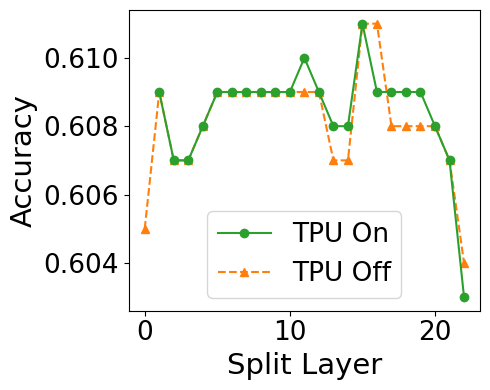

In [149]:
import matplotlib.pyplot as plt

# Define font size variables
scale_fonts = 7
label_font_size = 14 + scale_fonts
title_font_size = 16 + scale_fonts
tick_font_size = 12 + scale_fonts
legend_font_size = 12 + scale_fonts
offset_font_size = 12 + scale_fonts

# Prepare data for plotting
plot_data = df_fig5[df_fig5['params_edge-accelerator'].isin(['off', 'max'])].copy()

# Update the dataframe to rename 'std' to 'on' in the 'params_edge-accelerator' column
plot_data.loc[plot_data['params_edge-accelerator'] == 'max', 'params_edge-accelerator'] = 'on'

# Group by 'params_edge-accelerator' and 'params_layer' and calculate the mean of 'values_accuracy'
plot_data = plot_data.groupby(['params_edge-accelerator', 'params_layer']).mean().reset_index()

# Create a line plot to showcase the effect of layer and edge accelerator on accuracy
fig, ax = plt.subplots(figsize=(5, 4))

# Plot data for 'off' edge accelerator
off_data = plot_data[plot_data['params_edge-accelerator'] == 'off']
line1, = ax.plot(off_data['params_layer'], off_data['values_accuracy'], marker='^', color='tab:orange', linestyle='--')

# Plot data for 'on' edge accelerator
on_data = plot_data[plot_data['params_edge-accelerator'] == 'on']
line2, = ax.plot(on_data['params_layer'], on_data['values_accuracy'], marker='o', color='tab:green', linestyle='-')

ax.set_xlabel('Split Layer', fontsize=label_font_size)
ax.set_ylabel('Accuracy', fontsize=label_font_size)
ax.tick_params(axis='both', labelsize=tick_font_size)

# Create custom legend
custom_lines = [line2, line1]
ax.legend(custom_lines, ['TPU On', 'TPU Off'], fontsize=legend_font_size, loc='lower center')

fig.tight_layout()
plt.savefig('accuracy_effect.pdf', format='pdf', bbox_inches='tight')

# Show the plot
plt.show()


In [147]:


# Assuming df is your DataFrame
# Drop duplicates based on the specified columns
df_deduplicated = df.drop_duplicates(
    subset=['params_layer', 'params_edge-accelerator', 'params_cpu-freq', 'params_server-accelerator'])

# Convert the duration column from timedelta64[ns] to total seconds
total_seconds = df_deduplicated['duration'].dt.total_seconds().sum()

# Calculate total days and remaining hours
total_days = total_seconds // 86400
remaining_seconds = total_seconds % 86400
remaining_hours = remaining_seconds / 3600

print(f"Total duration: {total_days} days and {remaining_hours} hours")


Total duration: 4.0 days and 23.954130409722225 hours


In [148]:
study_names

NameError: name 'study_names' is not defined